In [247]:
import string
import unidecode
import math
import numpy as np
import pandas as pd

import nltk
from collections import defaultdict
#from nltk.stem.snowball import EnglishStemmer
from nltk.stem import SnowballStemmer #Stemming: Porter2 >  more aggressive than the Porter stemmer, Slightly faster, 
from nltk.tokenize import word_tokenize
#from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
%matplotlib inline


In [254]:
document_1 = "I love watching movies when it's cold outside Toy love loving"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary Toy love"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists Toy"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college Toy"

documents = [document_1, document_2, document_3, document_4, document_5]
documents[0]

"I love watching movies when it's cold outside Toy love loving"

In [255]:
def clean_text (text):
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove todas as pontuações: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = text.replace('\n',' ').strip() 
    text = text.lower()
    text = unidecode.unidecode(text)
    return text

clean_text(documents[0])

'i love watching movies when its cold outside toy love loving'

In [285]:
#redução das palavras para sua raiz (stemming), remoção de stopwords e palavras com menos de 2 caracteres, e criação do vocabulário com a quantidade de ocorrência de cada palavra em todos os documentos
def vocabulary_stemming(documents):
    docs_stem_words = []
    vocabulary = {}
    stop_words = stopwords.words('english')
    snowball_stemmer = SnowballStemmer("english")

    for index in range(len(documents)):
        text = documents[index]
        tokentext = word_tokenize(clean_text(text))
        stem_words  = [snowball_stemmer.stem(word) for word in tokentext if not word in stop_words and len(word) > 2 and word not in string.punctuation]
        docs_stem_words.append(stem_words)

        #Inicializa vocabulário sem repetição de palavras
        for word in stem_words:
            vocabulary[word] = 0

    #Contabiliza ocorrência de cada palavra em todos os documentos
    for words in docs_stem_words:
        for word in words:
            vocabulary[word] += 1

    idf = {}
    for word in vocabulary:
        count_word = vocabulary[word] 
        idf[word] = 1 + math.log(len(documents)/(count_word))
    
    return vocabulary, docs_stem_words, idf

vocabulary, docs_stem_words, idf = vocabulary_stemming(documents)

In [286]:
idf

{'love': 0.663527763378787,
 'watch': 1.0,
 'movi': 0.663527763378787,
 'cold': 2.6094379124341005,
 'outsid': 2.6094379124341005,
 'toy': 1.0,
 'stori': 2.6094379124341005,
 'best': 2.6094379124341005,
 'anim': 2.6094379124341005,
 'ever': 2.6094379124341005,
 'horror': 2.6094379124341005,
 'alon': 2.6094379124341005,
 'night': 2.6094379124341005,
 'realli': 2.6094379124341005,
 'scari': 2.6094379124341005,
 'film': 2.6094379124341005,
 'fill': 2.6094379124341005,
 'suspens': 2.6094379124341005,
 'unexpect': 2.6094379124341005,
 'plot': 2.6094379124341005,
 'twist': 2.6094379124341005,
 'mom': 2.6094379124341005,
 'dad': 2.6094379124341005,
 'hate': 2.6094379124341005,
 'theater': 2.6094379124341005,
 'brother': 2.6094379124341005,
 'like': 2.6094379124341005,
 'kind': 2.6094379124341005,
 'havent': 2.6094379124341005,
 'singl': 2.6094379124341005,
 'sinc': 2.6094379124341005,
 'got': 2.6094379124341005,
 'colleg': 2.6094379124341005}

In [257]:
def stemming_docs(documents):
    snowball_stemmer = SnowballStemmer("english")
    stop_words = stopwords.words('english')

    tokens = sum([word_tokenize(clean_text(document)) for document in documents], [])
    stem_words  = [snowball_stemmer.stem(word) for word in tokens if not word in stop_words and len(word) > 2 and word not in string.punctuation]

    return stem_words

stem_words = stemming_docs(documents)


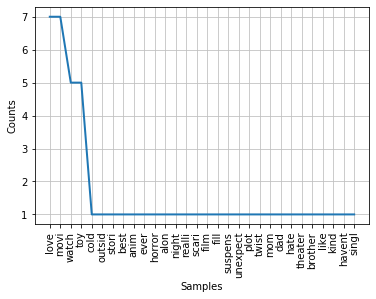

In [258]:
#Outra opção de tratamento na construção do vocabulário e frequencias
#snowball_stemmer = SnowballStemmer("english")
#stop_words = stopwords.words('english')

#tokens = sum([word_tokenize(clean_text(document)) for document in documents], [])
#stem_words  = [snowball_stemmer.stem(word) for word in tokens if not word in stop_words and len(word) > 2 and word not in string.punctuation]
stem_words = stemming_docs(documents)
words_frequency2 = FreqDist(stem_words)
words_frequency2.plot(30, cumulative = False)
#words_frequency1 = FreqDist(tokens)
#words_frequency1.plot(30, cumulative = False)

In [259]:
docs_stem_words

[['love', 'watch', 'movi', 'cold', 'outsid', 'toy', 'love', 'love'],
 ['toy', 'stori', 'best', 'anim', 'movi', 'ever', 'love'],
 ['watch',
  'horror',
  'movi',
  'alon',
  'night',
  'realli',
  'scari',
  'toy',
  'love'],
 ['love',
  'watch',
  'film',
  'fill',
  'suspens',
  'unexpect',
  'plot',
  'twist',
  'toy'],
 ['mom',
  'love',
  'watch',
  'movi',
  'dad',
  'hate',
  'movi',
  'theater',
  'brother',
  'like',
  'kind',
  'movi',
  'havent',
  'watch',
  'singl',
  'movi',
  'sinc',
  'got',
  'colleg',
  'toy']]

In [260]:
vocabulary.items()

dict_items([('love', 7), ('watch', 5), ('movi', 7), ('cold', 1), ('outsid', 1), ('toy', 5), ('stori', 1), ('best', 1), ('anim', 1), ('ever', 1), ('horror', 1), ('alon', 1), ('night', 1), ('realli', 1), ('scari', 1), ('film', 1), ('fill', 1), ('suspens', 1), ('unexpect', 1), ('plot', 1), ('twist', 1), ('mom', 1), ('dad', 1), ('hate', 1), ('theater', 1), ('brother', 1), ('like', 1), ('kind', 1), ('havent', 1), ('singl', 1), ('sinc', 1), ('got', 1), ('colleg', 1)])

In [287]:
#Criar índice invertido
def create_InvertedIndex(vocabulary, docs_stem_words,idf): 
    invertedList = dict()
    for term in vocabulary:
        invertedList[term] = list()
        index = 0
        for stem_words in docs_stem_words:
            frequencia = 0
            for word in stem_words:
                if word == term:
                    frequencia += 1
            if frequencia > 0:
                invertedList[term].append([index, frequencia,idf[term]])
            index += 1
    return invertedList

invertedList = create_InvertedIndex(vocabulary, docs_stem_words,idf)
invertedList.items()

dict_items([('love', [[0, 3, 0.663527763378787], [1, 1, 0.663527763378787], [2, 1, 0.663527763378787], [3, 1, 0.663527763378787], [4, 1, 0.663527763378787]]), ('watch', [[0, 1, 1.0], [2, 1, 1.0], [3, 1, 1.0], [4, 2, 1.0]]), ('movi', [[0, 1, 0.663527763378787], [1, 1, 0.663527763378787], [2, 1, 0.663527763378787], [4, 4, 0.663527763378787]]), ('cold', [[0, 1, 2.6094379124341005]]), ('outsid', [[0, 1, 2.6094379124341005]]), ('toy', [[0, 1, 1.0], [1, 1, 1.0], [2, 1, 1.0], [3, 1, 1.0], [4, 1, 1.0]]), ('stori', [[1, 1, 2.6094379124341005]]), ('best', [[1, 1, 2.6094379124341005]]), ('anim', [[1, 1, 2.6094379124341005]]), ('ever', [[1, 1, 2.6094379124341005]]), ('horror', [[2, 1, 2.6094379124341005]]), ('alon', [[2, 1, 2.6094379124341005]]), ('night', [[2, 1, 2.6094379124341005]]), ('realli', [[2, 1, 2.6094379124341005]]), ('scari', [[2, 1, 2.6094379124341005]]), ('film', [[3, 1, 2.6094379124341005]]), ('fill', [[3, 1, 2.6094379124341005]]), ('suspens', [[3, 1, 2.6094379124341005]]), ('unexpe

In [262]:
#Exibe os dados formatados
fmt = '{:<8}{:<15}{:<8}{}'

print(fmt.format('', 'Vocabulary', 'ni', 'Inverted Lists'))
for i, (vocab, ni, ocurrencies) in enumerate(zip(vocabulary.keys(), vocabulary.values(), invertedList.values())):
    print(fmt.format(i, vocab, ni, ocurrencies))

Vocabulary     ni      Inverted Lists
0       love           7       [[0, 3], [1, 1], [2, 1], [3, 1], [4, 1]]
1       watch          5       [[0, 1], [2, 1], [3, 1], [4, 2]]
2       movi           7       [[0, 1], [1, 1], [2, 1], [4, 4]]
3       cold           1       [[0, 1]]
4       outsid         1       [[0, 1]]
5       toy            5       [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]
6       stori          1       [[1, 1]]
7       best           1       [[1, 1]]
8       anim           1       [[1, 1]]
9       ever           1       [[1, 1]]
10      horror         1       [[2, 1]]
11      alon           1       [[2, 1]]
12      night          1       [[2, 1]]
13      realli         1       [[2, 1]]
14      scari          1       [[2, 1]]
15      film           1       [[3, 1]]
16      fill           1       [[3, 1]]
17      suspens        1       [[3, 1]]
18      unexpect       1       [[3, 1]]
19      plot           1       [[3, 1]]
20      twist          1       [[3, 1]]
21      mo

# Realizando Busca

In [292]:
def simple_lookup_query(query, invertedList):
    terms = stemming_docs([query])

    docs_index = {}

    for term in terms:
        if term in invertedList.keys():
            docs_index[term] = [index[0] for index in invertedList[term]]
        else:
            docs_index['missingTerm'] = None

    return docs_index

In [293]:
searchTerms = input("Digite os termos de busca: ")
docs_index = simple_lookup_query(searchTerms,invertedList)
docs_index

{'love': [0, 1, 2, 3, 4], 'missingTerm': None}

In [294]:
searchTerms

'love is python'

In [298]:
def print_search_result(docs_index, docs, operator='OR'):
    for i, (k, v) in enumerate(docs_index.items()):
        print("{:<8}key: {:<20} value: {}".format(i, k, v))

    print()

    resultList=[lista[1] for lista in docs_index.items()]

    responseSet = []

    if operator == 'AND' and 'missingTerm' in docs_index.keys():
        resultList = []
    elif 'missingTerm' in docs_index.keys():
    #    resultList.remove([''])
        resultList.remove(None)

    if len(resultList) == 1:
        responseSet = resultList[0]

    #Realiza a interseção entre os conjuntos
    for i in range(len(resultList)-1):
        #Operador AND
        if operator == 'AND':
            responseSet.append(list(set(resultList[i]).intersection(resultList[i+1])))
        else:
            #Operador OR
            responseSet.append(list(set(resultList[i]).union(resultList[i+1])))

    print("Foram encontrados ", len(np.unique(responseSet)), " documentos com o termo de busca...")
    print()

    #Monta o Resultado
    lista = []
    for doc in np.unique(responseSet):
        documento = docs[doc]
        for term in docs_index.keys():
            documento = documento.replace(term, "\033[48;5;0m\033[38;5;226m {term} \033[0;0m".format(term=term))        
        lista.append(str(str(doc+1) + " - " + documento))
        
    #Exibe o Resultado
    for resultado in lista:
        print(resultado)

    return

print_search_result(docs_index,documents,'OR')

0       key: love                 value: [0, 1, 2, 3, 4]
1       key: missingTerm          value: None

Foram encontrados  5  documentos com o termo de busca...

1 - I  love  watching movies when it's cold outside Toy  love  loving
2 - Toy Story is the best animation movie ever, I  love  it!
3 - Watching horror movies alone at night is really scary Toy  love 
4 - He  love s to watch films filled with suspense and unexpected plot twists Toy
5 - My mom  love s to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college Toy


document_1 = "I love watching movies when it's cold outside Toy love loving"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary Toy love"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists Toy"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college Toy"

{'watch': [[0, 1], [2, 1], [3, 1], [4, 2]],
 'movi': [[0, 1], [1, 1], [2, 1], [4, 4]]}

 0       key: love                 value: [0, 1, 2, 3, 4]
1       key: watch                value: [0, 2, 3, 4]
2       key: movi                 value: [0, 1, 2, 4]
3       key: missingTerm          value: ['']




In [267]:
invertedList

{'love': [[0, 3], [1, 1], [2, 1], [3, 1], [4, 1]],
 'watch': [[0, 1], [2, 1], [3, 1], [4, 2]],
 'movi': [[0, 1], [1, 1], [2, 1], [4, 4]],
 'cold': [[0, 1]],
 'outsid': [[0, 1]],
 'toy': [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]],
 'stori': [[1, 1]],
 'best': [[1, 1]],
 'anim': [[1, 1]],
 'ever': [[1, 1]],
 'horror': [[2, 1]],
 'alon': [[2, 1]],
 'night': [[2, 1]],
 'realli': [[2, 1]],
 'scari': [[2, 1]],
 'film': [[3, 1]],
 'fill': [[3, 1]],
 'suspens': [[3, 1]],
 'unexpect': [[3, 1]],
 'plot': [[3, 1]],
 'twist': [[3, 1]],
 'mom': [[4, 1]],
 'dad': [[4, 1]],
 'hate': [[4, 1]],
 'theater': [[4, 1]],
 'brother': [[4, 1]],
 'like': [[4, 1]],
 'kind': [[4, 1]],
 'havent': [[4, 1]],
 'singl': [[4, 1]],
 'sinc': [[4, 1]],
 'got': [[4, 1]],
 'colleg': [[4, 1]]}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_weights_matrix = vectorizer.fit_transform(documents)
search_query_weights = vectorizer.transform([searchTerms])

In [326]:
#Busca de similaridade
cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
similarity_list = cosine_distance[0]
similarity_list
#dataframe = pd.DataFrame(documents, index=[0])
#dataframe

array([0.54140581, 0.32197351, 0.27868387, 0.        , 0.        ])

In [338]:
len(similarity_list)

5

In [345]:
#filtro do documento mais similar
def most_similar(similarity_list, min_talks=1):

    most_similar= []
    idx_similar = 0

    while min_talks > 0 and idx_similar < len(similarity_list):
        tmp_index = np.argmax(similarity_list)
        most_similar.append(tmp_index)
        similarity_list[tmp_index] = -1
        min_talks -= 1
        idx_similar += 1

    return most_similar

similar_docs = most_similar(list(similarity_list), 20)

similar_docs

[0, 1, 2, 3, 4]

In [311]:
search_keys

['love', 'python']

In [310]:


def tf_idf(search_keys, dataframe, label):
  
	tfidf_vectorizer = TfidfVectorizer()
	tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])
	search_query_weights = tfidf_vectorizer.transform([search_keys])
	
	return searh_query_weights, tfidf_weights_matrix


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_similarity(search_query_weights, tfidf_weights_matrix):
	
	cosine_distance = cosine_similarity(query, tfidf_matrix)
	similarity_list = cosine_distance[0]
  
	return similarity_list

In [ ]:
import numpy as np

def most_similar(similarity_list, min_talks=1):
	
	most_similar= []
  
	while min_talks > 0:
		tmp_index = np.argmax(similarity_list)
		most_similar.append(tmp_index)
		similarity_list[tmp_index] = 0
		min_talks -= 1

	return most_similar